ESPECIALIZAÇÃO EM INTELIGÊNCIA ARTIFICIAL

Trabalho Final

Análise e Previsão de Séries Temporais

1. A atividade consiste em aplicar alguma técnica de previsão de séries temporais (aprendida ou não na disciplina) a algum problema. Por exemplo, aplicar um modelo ARIMA a séries temporais de dados financeiros. Vocês têm total liberdade para escolher o problema a ser abordado!
Para isso, vocês devem primeiramente escolher uma base de dados a ser utilizada como estudo. Para facilitar na busca de dados para o trabalho, existem muitos sites que fornecem bases de dados, normalmente usadas em Aprendizado de Máquina. Eles costumam ter a vantagem de oferecer uma base já armazenada em algum formato de arquivo que seja mais fácil de ser  processado a partir de linguagens de programação mais direcionadas para esse fim, como Python, R, dentre outras.

In [1]:
pip install pandas matplotlib statsmodels


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


            RES65     PM10         so2         co         o3       no2
DATA                                                                  
1997-01-01     11  36841.0  11326.0000     1.7133   68952.00  42535.00
1997-01-02      3  33634.0  16284.0000     1.6083      52.48     57.02
1997-01-03     11  35319.0     17.2100     1.8983      45.18  61838.00
1997-01-04      8  29742.0     16.0025  1675.0000  117338.00     78.51
1997-01-05     11  43343.0     21.3000  2012.0000     156.02  82008.00


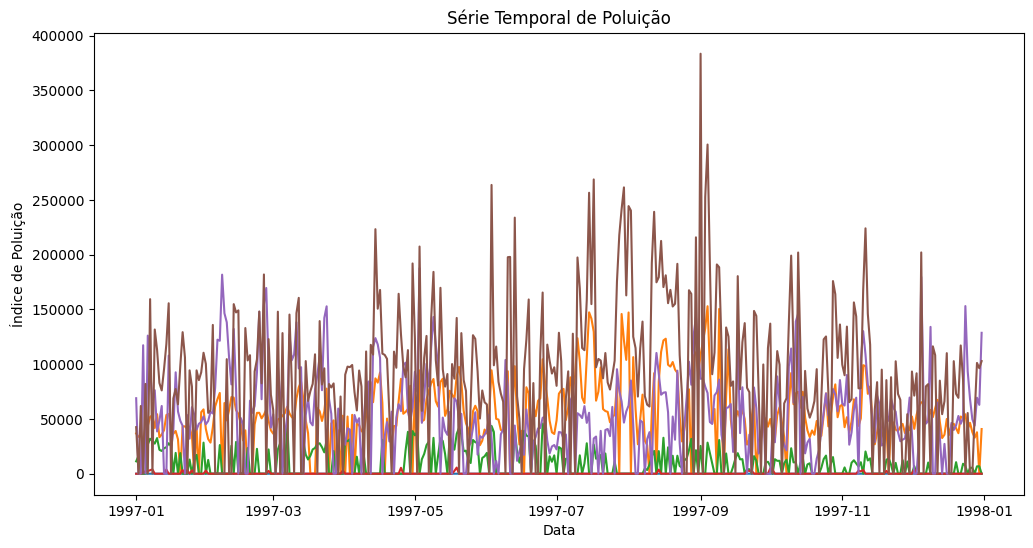

c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Nethy Azevedo\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


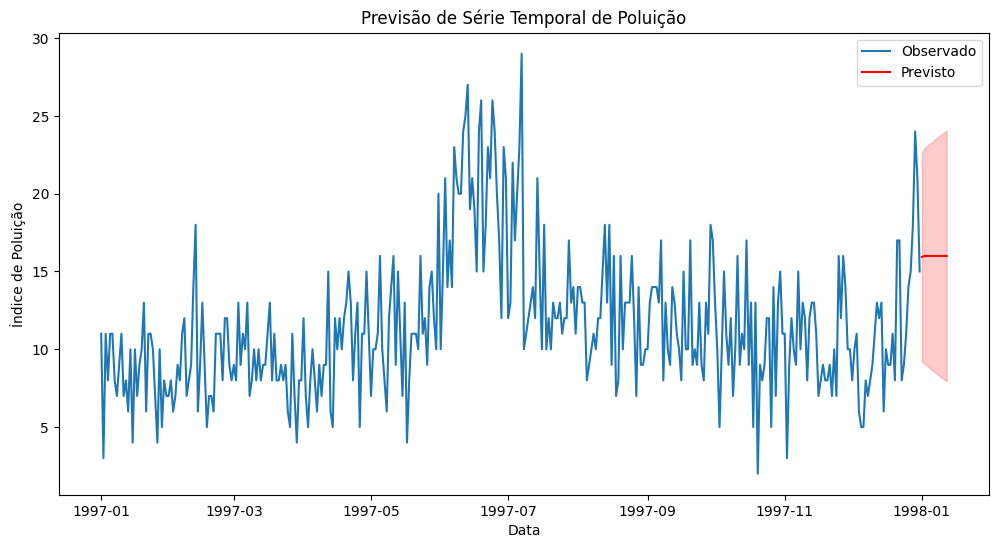

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Carregando os dados
url = "https://raw.githubusercontent.com/Nethyaze/Previs-o-de-S-ries-Temporais/main/a6_poluicao.csv"
df = pd.read_csv(url, parse_dates=['DATA'], index_col='DATA')  

# Verificando as primeiras linhas dos dados
print(df.head())

# Plotando a série temporal
plt.figure(figsize=(12, 6))
plt.plot(df)
plt.title('Série Temporal de Poluição')
plt.xlabel('Data')
plt.ylabel('Índice de Poluição')
plt.show()

# Ajustando um modelo ARIMA
model = ARIMA(df['RES65'], order=(1, 1, 1))  # Exemplo de ordem do modelo (p, d, q)
results = model.fit()

# Fazendo previsões para os próximos 12 passos (ajuste conforme necessário)
forecast_steps = 12
forecast = results.get_forecast(steps=forecast_steps)

# Obtendo intervalo de confiança
forecast_conf_int = forecast.conf_int()

# Plotando resultados
plt.figure(figsize=(12, 6))
plt.plot(df['RES65'], label='Observado')
plt.plot(forecast.predicted_mean, color='red', label='Previsto')
plt.fill_between(forecast_conf_int.index, forecast_conf_int.iloc[:, 0], forecast_conf_int.iloc[:, 1], color='red', alpha=0.2)
plt.title('Previsão de Série Temporal de Poluição')
plt.xlabel('Data')
plt.ylabel('Índice de Poluição')
plt.legend()
plt.show()


